In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w_init = 0.1
n = 2
m = n
iters = 150 * m
alpha = 0.25

A = np.zeros((m, n))
for i in range(m):
    A[i, i] = 1

In [3]:
def ReLU(x):
    return np.maximum(x, 0)

def dReLU(x):
    return ReLU(np.sign(x))

def grad(w, x):
    wx = w.dot(x)
    if wx < 0:
        return np.zeros_like(w)

    x_hat = w * ReLU(wx)
    wx_hat = w.dot(x_hat)
    return (x_hat - x) * wx + x * (wx_hat - wx)

def loss(w, x):
    x_hat = w * ReLU(w.dot(x))
    resid = x_hat - x
    return 0.5 * np.dot(resid, resid)

def pop_loss(w, A):
    m = A.shape[0]
    total_loss = 0
    for i in range(m):
        total_loss += loss(w, A[i])
    return total_loss / m

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
w = w_init * np.random.randn(n) / np.sqrt(n)
w = np.abs(w)
w = w_init * np.ones(n)
w[0] = .2
w[1] = 0.01
print(w)

w_history = np.zeros((iters + 1, n))
losses = np.zeros(iters + 1)
w_history[0] = w
losses[0] = pop_loss(w, A)

for iter in range(1, iters + 1):
    i = (iter - 1) % m
    # i = np.random.choice(m)
    x = A[i]
    w += -alpha * grad(w, x)
    w_history[iter] = w
    losses[iter] = pop_loss(w, A)

[0.2  0.01]


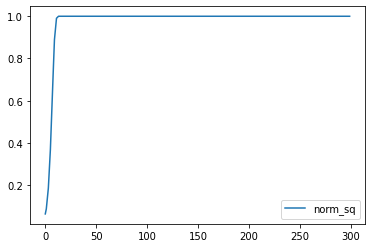

1.00008962905554 1.0357142857142858


In [5]:
norm_sq = moving_average(np.sum(np.square(w_history), axis=1), 2)
plt.plot(np.arange(iters), norm_sq, label="norm_sq")
plt.legend()
plt.show()
print(np.max(norm_sq), 1 + alpha / 7)

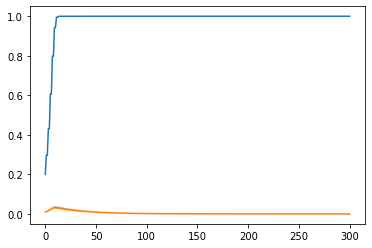

In [6]:
cutoff = iters + 1
for i in range(m):
    plt.plot(np.arange(cutoff), w_history[:cutoff, i])
plt.show()

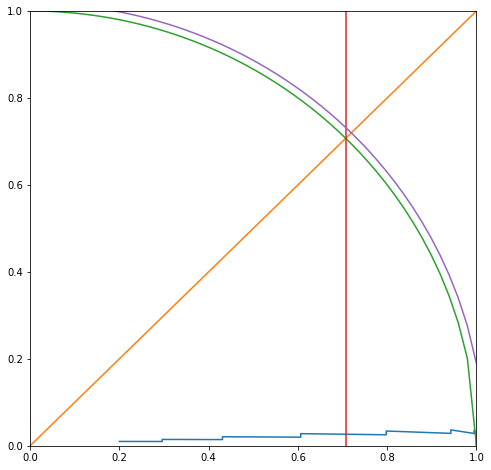

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

y = w_history[:, 0]
z = w_history[:, 1]
cutoff = iters + 1

plt.plot(y[:cutoff], z[:cutoff])
grid = np.linspace(0, 1)
circle = np.sqrt(1 - grid * grid)
R = np.sqrt(1 + alpha / 7)
big_circle = np.sqrt(R * R - grid * grid)
plt.plot(grid, grid)
plt.plot(grid, circle)
plt.plot([1/np.sqrt(2), 1/np.sqrt(2)], [0, 1])
plt.plot(grid, big_circle)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

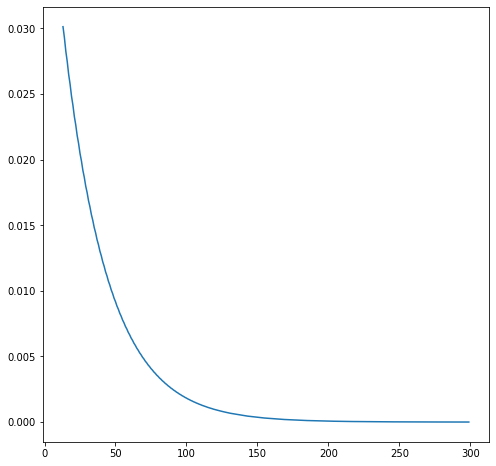

In [20]:
ratio = moving_average(z/y, 2)
cutoff = iters

scaled_norm = norm_sq
ind = np.where(scaled_norm[:cutoff] > 1)[0][0]
# ind = 0

plt.plot(np.arange(ind, cutoff), ratio[ind:cutoff])

# plt.plot(np.arange(ind, cutoff), scaled_norm[ind:cutoff])
plt.show()

# print(ratio[ind:cutoff])

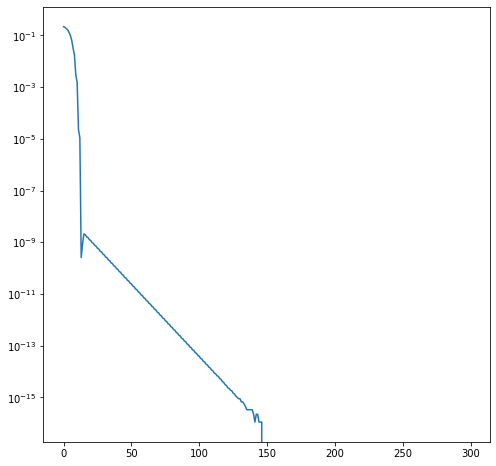

In [9]:
opt_gap = losses - (m - 1) / (2 * m)
plt.plot(np.arange(iters), moving_average(opt_gap, 2))
plt.yscale('log')
plt.show()

In [10]:
def update(y, z, alpha=0.25):
    ym = (1 + alpha * (2 - 2 * y * y - z * z))
    zm = (1 - alpha * y * y)
    y_new = y * ym
    z_new = z * zm
    return y_new, z_new

def gap(y0, z0, alpha=0.25):
    def V(y, z):
        return z - y
    y1, z1 = update(y0, z0, alpha)
    z2, y2 = update(z1, y1, alpha)
#     y3, z3 = update(y2, z2, alpha)
#     z4, y4 = update(z3, y3, alpha)
    return V(y2, z2) - V(y0, z0)

def ratio_gap(y0, z0, alpha=0.25):
    y1, z1 = update(y0, z0, alpha)
    z2, y2 = update(z1, y1, alpha)
    return (y2/z2 - y0/z0) / (y0 / z0)

def norm_gap(y0, z0, alpha=0.25):
    y1, z1 = update(y0, z0, alpha)
    z2, y2 = update(z1, y1, alpha)
    return (y2*y2 + z2*z2) - (y0*y0 + z0*z0)

In [11]:
num = 500
y_grid = np.linspace(0.01, 0.99, num=num)
z_grid = np.linspace(0.01, 0.99, num=num)

vals = np.zeros((num, num))
y_vals = np.zeros((num, num))
z_vals = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        y_vals[i, j] = y_grid[i]
        z_vals[i, j] = z_grid[j]
        vals[i, j] = norm_gap(y_grid[i], z_grid[j], alpha)

y_vals = y_vals.flatten()
z_vals = z_vals.flatten()
vals = vals.flatten()

In [12]:
num = 500
y_grid = np.linspace(0.01, 0.99, num=num)
z_grid = np.linspace(0.01, 0.99, num=num)

vals = np.zeros((num, num))
y_vals = np.zeros((num, num))
z_vals = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        y_vals[i, j] = y_grid[i]
        z_vals[i, j] = z_grid[j]
        vals[i, j] = gap(y_grid[i], z_grid[j], alpha)

y_vals = y_vals.flatten()
z_vals = z_vals.flatten()
vals = vals.flatten()

In [13]:
num = 500
y_grid = np.linspace(0.01, 0.99, num=num)
z_grid = np.linspace(0.01, 0.99, num=num)

rvals = np.zeros((num, num))
y_vals = np.zeros((num, num))
z_vals = np.zeros((num, num))

for i in range(num):
    for j in range(num):
        y_vals[i, j] = y_grid[i]
        z_vals[i, j] = z_grid[j]
        rvals[i, j] = ratio_gap(y_grid[i], z_grid[j], alpha)

y_vals = y_vals.flatten()
z_vals = z_vals.flatten()
rvals = rvals.flatten()

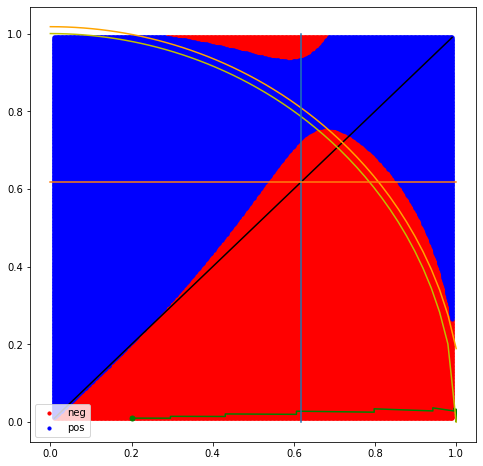

In [14]:
neg = np.where(vals <= 0)[0]
pos = np.where(vals > 0)[0]
cutoff = 100

plt.scatter(y_vals[neg], z_vals[neg], s=10, c='r', label='neg')
plt.scatter(y_vals[pos], z_vals[pos], s=10, c='b', label='pos')
plt.plot(y[:cutoff], z[:cutoff], 'g-')
plt.plot(y_grid, y_grid, 'k')
plt.plot(grid, circle, 'y')
plt.plot(grid, big_circle, 'orange')
plt.plot(w_history[0, 0], w_history[0, 1], 'go', markersize=5)
plt.plot([0.6168, 0.6168], [0, 1])
plt.plot([0, 1], [0.6168, 0.6168])

plt.legend(loc="lower left")
plt.show()

In [15]:
print(gap(0.6168, np.sqrt(1 + alpha / 8 - 0.6168 * 0.6168)))
print(gap(np.sqrt(1 + alpha / 8 - 0.6168 * 0.6168), 0.6168))
theta = np.pi / 4
print(gap(np.cos(theta) * np.sqrt(1 + alpha / 8), np.sin(theta) * np.sqrt(1 + alpha / 8)))
print(gap(np.cos(theta), np.sin(theta)))

0.005949540532565689
-0.014975056241735007
-0.005261892263063284
-0.007595873626027538


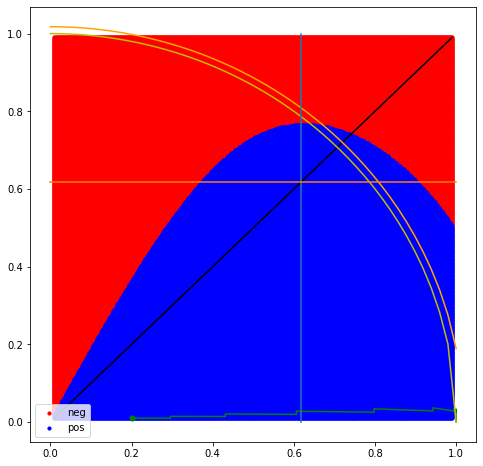

In [16]:
neg = np.where(rvals <= 0)[0]
pos = np.where(rvals > 0)[0]

plt.scatter(y_vals[neg], z_vals[neg], s=10, c='r', label='neg')
plt.scatter(y_vals[pos], z_vals[pos], s=10, c='b', label='pos')
plt.plot(y, z, 'g-')
plt.plot(y_grid, y_grid, 'k')
plt.plot(grid, circle, 'y')
plt.plot(grid, big_circle, 'orange')
plt.plot(w_history[0, 0], w_history[0, 1], 'go', markersize=5)
plt.plot([0.6168, 0.6168], [0, 1])
plt.plot([0, 1], [0.6168, 0.6168])

plt.legend(loc="lower left")
plt.show()

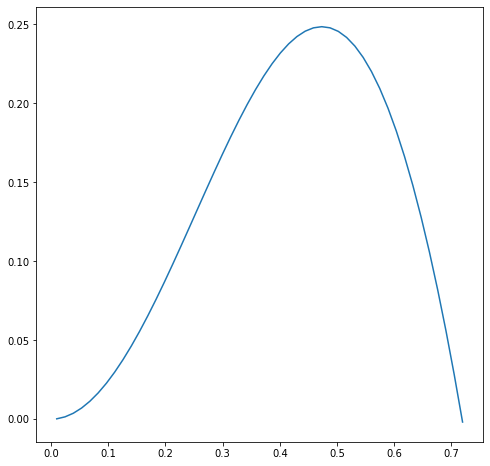

In [17]:
y_grid = np.linspace(0.01, R / np.sqrt(2))
diag_vals = np.zeros(len(y_grid))
for i in range(len(y_grid)):
    diag_vals[i] = norm_gap(y_grid[i], y_grid[i])
plt.plot(y_grid, diag_vals)
plt.show()


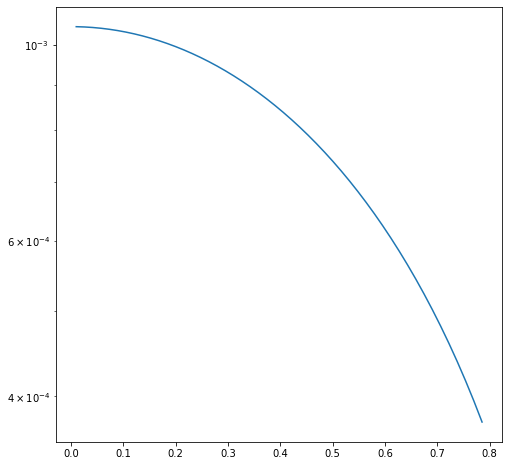

[0.00104777 0.001047   0.00104557 0.00104346 0.00104068 0.00103723
 0.00103312 0.00102835 0.00102292 0.00101684 0.00101012 0.00100276
 0.00099478 0.00098617 0.00097695 0.00096712 0.0009567  0.0009457
 0.00093413 0.00092199 0.00090931 0.00089609 0.00088234 0.00086809
 0.00085334 0.00083812 0.00082242 0.00080628 0.00078971 0.00077272
 0.00075533 0.00073756 0.00071942 0.00070094 0.00068213 0.00066301
 0.00064361 0.00062393 0.000604   0.00058385 0.00056348 0.00054292
 0.00052219 0.00050132 0.00048032 0.00045921 0.00043801 0.00041675
 0.00039545 0.00037413]


In [18]:
r = .06
theta_grid = np.linspace(0.01, np.pi / 4)
rot_vals = np.zeros(len(theta_grid))
for i in range(len(theta_grid)):
    theta = theta_grid[i]
    rot_vals[i] = ratio_gap(r * np.cos(theta), r * np.sin(theta))
plt.plot(theta_grid, rot_vals)
plt.yscale('log')
plt.show()
print(rot_vals)

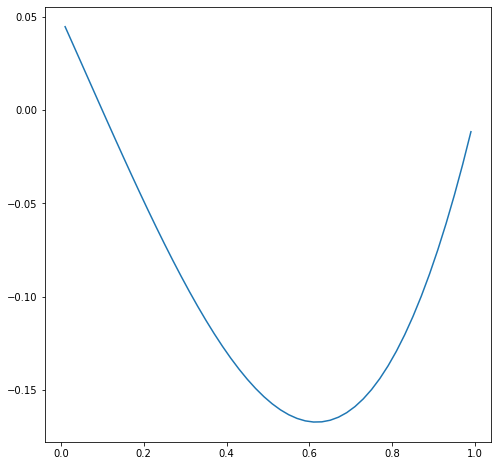

[ 0.04455362  0.0346169   0.02464165  0.0146521   0.00467271 -0.00527191
 -0.01515692 -0.02495731 -0.03464788 -0.04420326 -0.0535979  -0.06280607
 -0.0718019  -0.08055935 -0.08905223 -0.09725424 -0.10513891 -0.11267968
 -0.11984988 -0.12662272 -0.13297134 -0.1388688  -0.1442881  -0.14920219
 -0.15358395 -0.15740629 -0.16064206 -0.16326413 -0.16524539 -0.16655875
 -0.16717715 -0.16707362 -0.16622124 -0.16459318 -0.1621627  -0.15890319
 -0.15478815 -0.14979125 -0.14388628 -0.13704721 -0.1292482  -0.1204636
 -0.11066794 -0.09983601 -0.08794277 -0.07496346 -0.06087354 -0.04564873
 -0.02926501 -0.01169862]


In [19]:
y_grid = np.linspace(0.01, 0.99)
diff_vals = np.zeros(len(y_grid))
for i in range(len(y_grid)):
    diff_vals[i] = gap(y_grid[i], 0.1)
plt.plot(y_grid, diff_vals)

plt.show()
print(diff_vals)